<a href="https://colab.research.google.com/github/DanyPao/DataScience2/blob/main/Primera_Preentrega_Daniela_Esposito_Smoker_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto: Smoker Status Prediction**

Data Science II ~ Primera pre-entrega


##Datos:

####Alumna: Daniela Paola Espósito
####Comisión: 61145
####Docente: David Silvera
####Tutora: María Soledad Gutiérrez


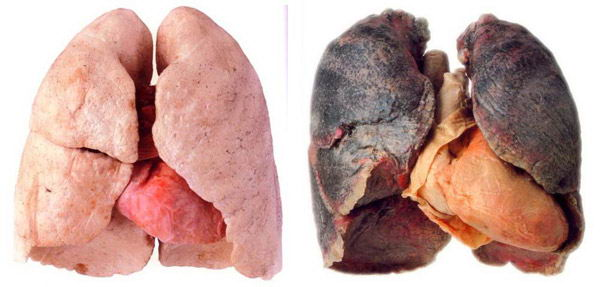

##Introducción:
#####Según la Organización Mundial de la Salud (OMS), el tabaco es la primera causa evitable de enfermedad, invalidez y muerte prematura en el mundo.
#####El tabaquismo es la causa de...


#####Más del 90% de los casos de bronquitis.
#####Del 95% de los casos de cáncer de pulmón.
#####Del 30% de todas las cardiopatías coronarias.
#####Parte importante de los casos de cáncer de esófago, vejiga urinaria, cavidad bucal y laringe.

#####Por todo lo anterior, es de gran importancia poder detectar si una persona es fumadora o no, a través de estudios de rutina.

#####Muchas veces por diversas razones, los pacientes no son sinceros o entran en una emergencia sin posibilidad de preguntar si fuma o no, y por lo tanto, cuando el médico no tiene los datos justos, no puede diagnosticar correctamente.

#####Si con este modelo se logra predicir el tabaquismo de una persona, no importará si se sabe o no, si esa persona fuma para que el medico pueda diagnosticar eficazmente.

###Objetivo

El objetivo de este proyecto es poder si crear un modelo que pueda predecir el estado de tabaquismo de un individuo utilizando bioseñales.

###Hipótesis

Un modelo de aprendizaje automático será capaz de clasificar con precisión las instancias en diferentes categorías basadas en los siguientes atributos:

"Fuma"

"No Fuma"

###Preguntas:

######¿Qué marcadores biológicos están relacionados con el tabaquismo?
######¿Hay alguna bioseñal que por si sola pueda indicar si es fumador?
######¿Qué indicadores combinados pueden predecir si padece tabaquismo?


##EDA

###Librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###Carga de datos

In [6]:
url = 'https://raw.githubusercontent.com/DanyPao/DataScience2/main/test_dataset.csv'
df = pd.read_csv(url)

In [7]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,170,65,75.1,1.0,0.9,1,1,120,70,...,260,41,132,15.7,1,0.8,24,26,32,0
1,45,170,75,89.0,0.7,1.2,1,1,100,67,...,345,49,140,15.7,1,1.1,26,28,138,0
2,30,180,90,94.0,1.0,0.8,1,1,115,72,...,103,53,103,13.5,1,1.0,19,29,30,0
3,60,170,50,73.0,0.5,0.7,1,1,118,78,...,70,65,108,14.1,1,1.3,31,28,33,0
4,30,170,65,78.0,1.5,1.0,1,1,110,70,...,210,45,103,14.7,1,0.8,21,21,19,0


###Normalización

In [14]:
df=df.rename(columns={'Age':'edad','height(cm)':'altura','weight(cm)':'peso','waist(cm)':'cintura','eyesight(left)':'vista_izq','eyesight(right)':'vista_der','hearing(left)':'audicion_izq','hearing(right)':'audicion_der','systolic':'sistolica','relaxation':'diastolica','fasting blood sugar':'glucosa','Cholesterol':'colesterol','triglyceride':'trigliceridos','hemoglobin':'hemoglobina','Urine protein':'proteina_orina','serum creatinine':'creatinina','dental caries':'caries_dental'})

In [15]:
df.columns

Index(['age', 'altura', 'weight(kg)', 'cintura', 'vista_izq', 'vista_der',
       'audicion_izq', 'audicion_der', 'sistolica', 'diastolica', 'glucosa',
       'colesterol', 'trigliceridos', 'HDL', 'LDL', 'hemoglobina',
       'proteina_orina', 'creatinina', 'AST', 'ALT', 'Gtp', 'caries_dental'],
      dtype='object')

###Descripción de Variables

###Estadística descriptiva

###Cardinalidad

##Data Wrangling

###Outliers

###Correlación

##Gráficos

##Conclusiones